#### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

#### Load Iris DataSet

In [3]:
iris = load_iris()

In [4]:
x=iris.data

In [5]:
y=iris.target

###### Normalize

In [6]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

###### Split Data

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

#### Train KNN Classifier

In [9]:
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    print(f"K={k}, Accuracy={accuracy_score(y_test, y_pred):.2f}")

K=1, Accuracy=0.98
K=3, Accuracy=1.00
K=5, Accuracy=1.00
K=7, Accuracy=1.00
K=9, Accuracy=1.00


###### Evaluate Model

In [10]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [11]:
print("Accuaracy: ",accuracy_score(y_test,y_pred))

Accuaracy:  1.0


#### Visualize Decision Boundaries

In [13]:
x_vis=x_scaled[:, :2]
x_train_vis, x_test_vis, y_train_vis, y_test_vis = train_test_split(x_vis, y, test_size=0.3, random_state=42)

In [14]:

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(x_train_vis, y_train_vis)

KNeighborsClassifier()

In [15]:
X_min, X_max = x_vis[:, 0].min() - 1, x_vis[:, 0].max() + 1
y_min, y_max = x_vis[:, 1].min() - 1, x_vis[:, 1].max() + 1
XX, yy = np.meshgrid(np.arange(X_min, X_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [16]:
Z = knn_vis.predict(np.c_[XX.ravel(), yy.ravel()])
Z = Z.reshape(XX.shape)

### Plot

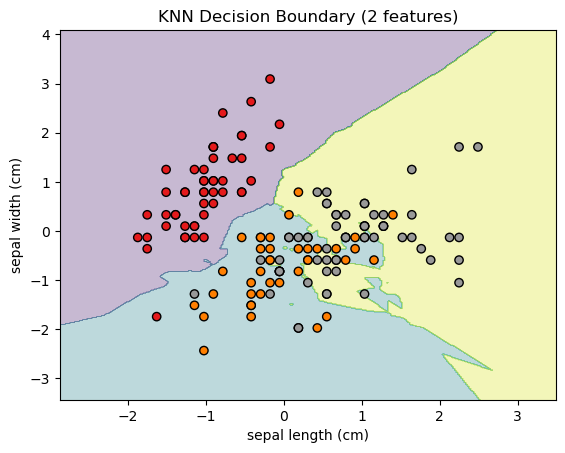

In [17]:
plt.contourf(XX, yy, Z, alpha=0.3)
plt.scatter(x_vis[:, 0], x_vis[:, 1], c=y, edgecolor="k", cmap=plt.cm.Set1)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("KNN Decision Boundary (2 features)")
plt.show()